# Data processing

## load libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, average_precision_score, roc_curve, precision_recall_curve, auc, make_scorer, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear import LogisticRegression
import matplotlib.pyplot as plt

np.random.seed(42)


## Load Banksim dataset

In [2]:
# Load the datasets
df = pd.read_csv('bs140513_032310.csv')

In [3]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [4]:
df['zipcodeOri'].unique()

array(["'28007'"], dtype=object)

### Calculate percentage of frauds in dataset

In [5]:
p = len(df[df['fraud'] == 1]) / len(df)
p

0.012108105199254007

### Drop personal information columns

In [6]:
df_new = df.drop(columns = ['age', 'gender', 'zipcodeOri', 'zipMerchant'])
df_new.sort_values('customer')

,step,customer,merchant,category,amount,fraud
398924,126,'C1000148617','M348934600','es_transportation',40.29,0
484810,150,'C1000148617','M1842530320','es_tech',96.58,0
177125,61,'C1000148617','M1823072687','es_transportation',11.32,0
527971,162,'C1000148617','M348934600','es_transportation',36.83,0
508935,156,'C1000148617','M1823072687','es_transportation',28.67,0
...,...,...,...,...,...,...
585496,177,'C999723254','M85975013','es_food',62.55,0
133139,47,'C999723254','M855959430','es_hyper',9.93,0
138573,49,'C999723254','M348934600','es_transportation',19.26,0
243363,81,'C999723254','M1823072687','es_transportation',28.74,0


### Print uniqe merchants

In [7]:
df_new['merchant'].unique()

array(["'M348934600'", "'M1823072687'", "'M50039827'", "'M1888755466'",
       "'M1053599405'", "'M85975013'", "'M480139044'", "'M692898500'",
       "'M348875670'", "'M151143676'", "'M840466850'", "'M1741626453'",
       "'M1535107174'", "'M855959430'", "'M349281107'", "'M209847108'",
       "'M2122776122'", "'M1873032707'", "'M2011752106'", "'M857378720'",
       "'M1198415165'", "'M1748431652'", "'M980657600'", "'M1352454843'",
       "'M117188757'", "'M547558035'", "'M17379832'", "'M1649169323'",
       "'M1946091778'", "'M97925176'", "'M923029380'", "'M1353266412'",
       "'M1842530320'", "'M677738360'", "'M1313686961'", "'M732195782'",
       "'M1600850729'", "'M1872033263'", "'M3697346'", "'M495352832'",
       "'M1400236507'", "'M1294758098'", "'M1913465890'", "'M45060432'",
       "'M78078399'", "'M2080407379'", "'M1788569036'", "'M1416436880'",
       "'M933210764'", "'M1726401631'"], dtype=object)

### Print all transactions with 0 value transactions

In [8]:
df_zero = df_new[df_new['amount'] == 0]
df_zero

,step,customer,merchant,category,amount,fraud
40502,15,'C1918953803','M348934600','es_transportation',0.0,0
46361,17,'C782199851','M348934600','es_transportation',0.0,0
48560,18,'C92282564','M348934600','es_transportation',0.0,0
64613,24,'C612357573','M348934600','es_transportation',0.0,0
84320,31,'C1299474405','M348934600','es_transportation',0.0,0
87713,32,'C1814870538','M1823072687','es_transportation',0.0,0
88889,32,'C1189224644','M1823072687','es_transportation',0.0,0
89155,32,'C1598762673','M1823072687','es_transportation',0.0,0
127028,45,'C876944738','M1823072687','es_transportation',0.0,0
133555,47,'C73919470','M348934600','es_transportation',0.0,0


In [9]:
df_new = df_new[df_new['amount'] != 0]
df_new

,step,customer,merchant,category,amount,fraud
0,0,'C1093826151','M348934600','es_transportation',4.55,0
1,0,'C352968107','M348934600','es_transportation',39.68,0
2,0,'C2054744914','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','M348934600','es_transportation',17.25,0
4,0,'C757503768','M348934600','es_transportation',35.72,0
...,...,...,...,...,...,...
594638,179,'C1753498738','M1823072687','es_transportation',20.53,0
594639,179,'C650108285','M1823072687','es_transportation',50.73,0
594640,179,'C123623130','M349281107','es_fashion',22.44,0
594641,179,'C1499363341','M1823072687','es_transportation',14.46,0


## Calculate statistical features for each unique merchant

In [11]:
# Precompute unique values for 'merchant'
unique_merchants = df_new['merchant'].unique()

# Initialize lists to store customer IDs and features
features_per_customer = []

# Generate column names dynamically
stat_names = ['min', 'max', 'mean', 'median', 'std', 'count', 'sum']
column_names = ['customer']

for merchant in unique_merchants:
    for stat in stat_names:
        column_names.append(f'{merchant}_{stat}')

# Iterate over each customer
for customer_id in df_new['customer'].unique():
    customer_features = []
    # Filter transactions associated with the current customer
    customer_transactions = df_new[df_new['customer'] == customer_id]
    
    # Group by 'merchant' and calculate required statistics
    grouped = customer_transactions.groupby('merchant')['amount'].agg(
        ['min', 'max', 'mean', 'median', 'std', 'count', 'sum']
    ).reset_index()

    # Iterate over each merchant
    for merchant in unique_merchants:
        filtered = grouped[grouped['merchant'] == merchant]
        if filtered.empty:
            customer_features.extend([0, 0, 0, 0, 0, 0, 0])
        else:
            row = filtered.iloc[0]
            std_value = row['std'] if not pd.isna(row['std']) else 0
            customer_features.extend([
                row['min'],
                row['max'],
                row['mean'],
                row['median'],
                std_value,
                row['count'],
                row['sum']
            ])
    
    features_per_customer.append([customer_id] + customer_features)

# Convert lists to numpy arrays
customer_ids = np.array(df_new['customer'].unique()).reshape(-1, 1)
other_features = np.array(features_per_customer)

# Combine CustomerID and features
features_per_customer = np.array(features_per_customer)

# Convert features_per_customer into a DataFrame
df_merchant_features = pd.DataFrame(features_per_customer, columns=column_names)

df_merchant_features

,customer,'M348934600'_min,'M348934600'_max,'M348934600'_mean,'M348934600'_median,'M348934600'_std,'M348934600'_count,'M348934600'_sum,'M1823072687'_min,'M1823072687'_max,...,'M933210764'_std,'M933210764'_count,'M933210764'_sum,'M1726401631'_min,'M1726401631'_max,'M1726401631'_mean,'M1726401631'_median,'M1726401631'_std,'M1726401631'_count,'M1726401631'_sum
0,'C1093826151',0.87,83.55,27.97902597402597,26.799999999999997,17.226239400451686,154,4308.7699999999995,0,0,...,0,0,0,0,0,0,0,0,0,0
1,'C352968107',2.03,70.0,31.440153846153844,31.83,17.855690487585782,65,2043.61,0.53,72.74,...,0,0,0,0,0,0,0,0,0,0
2,'C2054744914',1.56,72.66,31.79478260869565,28.06,21.724930143117152,23,731.28,2.6,81.19,...,0,0,0,0,0,0,0,0,0,0
3,'C1760612790',1.23,80.78,24.950181818181818,24.69,16.796403218470353,55,1372.26,0.07,72.9,...,0,0,0,0,0,0,0,0,0,0
4,'C757503768',3.15,67.68,26.694109589041098,24.24,15.180820395377594,73,1948.67,0.01,75.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,'C650117238',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4108,'C2095815783',0.9,77.97,25.19741379310345,21.189999999999998,18.277799932901516,58,1461.45,0,0,...,0,0,0,0,0,0,0,0,0,0
4109,'C1014783484',3.99,43.54,23.313333333333333,17.94,13.793158630277548,9,209.82,0.6,96.49,...,0,0,0,0,0,0,0,0,0,0
4110,'C849065220',0,0,0,0,0,0,0,0,0,...,0,1,76.32,0,0,0,0,0,0,0


## Calculate statistical features for each unique Category

In [12]:
# Precompute unique values for 'category'
unique_categories = df_new['category'].unique()

# Initialize lists to store customer IDs and features
features_per_customer = []

# Generate column names dynamically
stat_names = ['min', 'max', 'mean', 'median', 'std', 'count', 'sum']
column_names = ['customer']

for category in unique_categories:
    for stat in stat_names:
        column_names.append(f'{category}_{stat}')

# Iterate over each customer
for customer_id in df['customer'].unique():
    customer_features = []
    # Filter transactions associated with the current customer
    customer_transactions = df[df['customer'] == customer_id]
    
    # Group by 'category' and calculate required statistics
    grouped = customer_transactions.groupby('category')['amount'].agg(
        ['min', 'max', 'mean', 'median', 'std', 'count', 'sum']
    ).reset_index()

    # Iterate over each category
    for category in unique_categories:
        filtered = grouped[grouped['category'] == category]
        if filtered.empty:
            customer_features.extend([0, 0, 0, 0, 0, 0, 0])
        else:
            row = filtered.iloc[0]
            std_value = row['std'] if not pd.isna(row['std']) else 0
            customer_features.extend([
                row['min'],
                row['max'],
                row['mean'],
                row['median'],
                std_value,
                row['count'],
                row['sum']
            ])
    
    features_per_customer.append(customer_features)

# Convert lists to numpy arrays
customer_ids = np.array(df_new['customer'].unique()).reshape(-1, 1)
other_features = np.array(features_per_customer)

# Combine CustomerID and scaled features
features_per_customer = np.concatenate((customer_ids, other_features), axis=1)

# Convert scaled_features_per_customer into a DataFrame
df_category_features = pd.DataFrame(features_per_customer, columns=column_names)

# Display the DataFrame
df_category_features


,customer,'es_transportation'_min,'es_transportation'_max,'es_transportation'_mean,'es_transportation'_median,'es_transportation'_std,'es_transportation'_count,'es_transportation'_sum,'es_health'_min,'es_health'_max,...,'es_travel'_std,'es_travel'_count,'es_travel'_sum,'es_leisure'_min,'es_leisure'_max,'es_leisure'_mean,'es_leisure'_median,'es_leisure'_std,'es_leisure'_count,'es_leisure'_sum
0,'C1093826151',0.87,83.55,27.979026,26.8,17.226239,154.0,4308.77,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'C352968107',0.53,72.74,29.417067,27.39,17.970201,150.0,4412.56,72.0,135.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'C2054744914',1.56,81.19,33.004667,28.06,22.002522,45.0,1485.21,0.32,189.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,'C1760612790',0.07,80.78,27.418824,26.23,18.940285,153.0,4195.08,14.58,162.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,'C757503768',0.01,75.2,27.696406,25.415,16.677857,128.0,3545.14,79.31,79.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,'C650117238',0.0,0.0,0.0,0.0,0.0,0.0,0.0,587.03,587.03,...,0.0,1.0,1914.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4108,'C2095815783',0.9,77.97,25.197414,21.19,18.2778,58.0,1461.45,546.19,546.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4109,'C1014783484',0.6,96.49,26.016,22.53,17.451716,65.0,1691.04,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4110,'C849065220',0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.22,44.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Combine statistical Features

In [13]:
df_merged = df_new.merge(df_merchant_features, on = ['customer'])
df_full = df_merged.merge(df_category_features, on = ['customer'])
df_full

,step,customer,merchant,category,amount,fraud,'M348934600'_min,'M348934600'_max,'M348934600'_mean,'M348934600'_median,...,'es_travel'_std,'es_travel'_count,'es_travel'_sum,'es_leisure'_min,'es_leisure'_max,'es_leisure'_mean,'es_leisure'_median,'es_leisure'_std,'es_leisure'_count,'es_leisure'_sum
0,0,'C1093826151','M348934600','es_transportation',4.55,0,0.87,83.55,27.97902597402597,26.799999999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,'C352968107','M348934600','es_transportation',39.68,0,2.03,70.0,31.440153846153844,31.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,'C2054744914','M1823072687','es_transportation',26.89,0,1.56,72.66,31.79478260869565,28.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,'C1760612790','M348934600','es_transportation',17.25,0,1.23,80.78,24.950181818181818,24.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,'C757503768','M348934600','es_transportation',35.72,0,3.15,67.68,26.694109589041098,24.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594586,179,'C1753498738','M1823072687','es_transportation',20.53,0,2.85,55.35,31.00444444444444,30.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
594587,179,'C650108285','M1823072687','es_transportation',50.73,0,0.1,78.47,26.20485714285714,22.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
594588,179,'C123623130','M349281107','es_fashion',22.44,0,0.5,79.29,29.14167883211679,27.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
594589,179,'C1499363341','M1823072687','es_transportation',14.46,0,0.7,88.46,26.489803921568626,24.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Calculate Frequency and Monetary per category and merchant

In [14]:
gamma = 0.02  

# Create a copy of the full dataframe and sort it
df_recency = df_full.copy()
df_recency.sort_values(by=['customer', 'category', 'merchant', 'step'], inplace=True)

# Calculate Delta_t for category and merchant simultaneously
df_recency['Delta_t_category'] = df_recency.groupby(['customer', 'category'])['step'].diff().fillna(0)
df_recency['category_recency'] = np.exp(-gamma * df_recency['Delta_t_category'])

df_recency['Delta_t_merchant'] = df_recency.groupby(['customer', 'merchant'])['step'].diff().fillna(0)
df_recency['merchant_recency'] = np.exp(-gamma * df_recency['Delta_t_merchant'])

# Drop intermediate Delta_t columns
df_recency.drop(columns=['Delta_t_category', 'Delta_t_merchant'], inplace=True)

In [22]:
# Create period column
df_recency['period'] = pd.cut(df_recency['step'], bins=6, labels=[1, 2, 3, 4, 5, 6])

# Calculate RFM metrics for category and merchant
rfm_category = df_recency.groupby(['customer', 'period', 'category'], observed=True).agg({
    'customer': 'count',  # Frequency
    'amount': 'sum'  # Monetary
}).rename(columns={'customer': 'category_frequency', 'amount': 'category_monetary'})

rfm_merchant = df_recency.groupby(['customer', 'period', 'merchant'], observed=True).agg({
    'customer': 'count',  # Frequency
    'amount': 'sum'  # Monetary
}).rename(columns={'customer': 'merchant_frequency', 'amount': 'merchant_monetary'})

# Merge the RFM metrics back to the recency dataframe
df_final_unscaled = df_recency.merge(rfm_category, on=['customer', 'period', 'category'], how='left')
df_final_unscaled = df_final_unscaled.merge(rfm_merchant, on=['customer', 'period', 'merchant'], how='left')

df_final_unscaled

/tmp/ipykernel_1019286/1045336165.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_category = df_recency.groupby(['customer', 'period', 'category']).agg({
/tmp/ipykernel_1019286/1045336165.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_merchant = df_recency.groupby(['customer', 'period', 'merchant']).agg({


,step,customer,merchant,category,amount,fraud,'M348934600'_min,'M348934600'_max,'M348934600'_mean,'M348934600'_median,...,'es_leisure'_std,'es_leisure'_count,'es_leisure'_sum,category_recency,merchant_recency,period,category_frequency,category_monetary,merchant_frequency,merchant_monetary
0,48,'C1000148617','M85975013','es_food',14.84,0,4.31,63.32,28.950454545454544,24.555,...,0.0,0.0,0.0,1.000000,1.000000,2,1,14.84,1,14.84
1,79,'C1000148617','M85975013','es_food',23.77,0,4.31,63.32,28.950454545454544,24.555,...,0.0,0.0,0.0,0.537944,0.537944,3,1,23.77,1,23.77
2,91,'C1000148617','M85975013','es_food',59.85,0,4.31,63.32,28.950454545454544,24.555,...,0.0,0.0,0.0,0.786628,0.786628,4,2,75.31,2,75.31
3,107,'C1000148617','M85975013','es_food',15.46,0,4.31,63.32,28.950454545454544,24.555,...,0.0,0.0,0.0,0.726149,0.726149,4,2,75.31,2,75.31
4,167,'C1000148617','M85975013','es_food',15.79,0,4.31,63.32,28.950454545454544,24.555,...,0.0,0.0,0.0,0.301194,0.301194,6,1,15.79,1,15.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594586,77,'C999723254','M348934600','es_transportation',27.37,0,0.55,48.52,20.674074074074074,20.77,...,0.0,0.0,0.0,0.980199,0.980199,3,26,510.20,19,340.50
594587,78,'C999723254','M348934600','es_transportation',0.55,0,0.55,48.52,20.674074074074074,20.77,...,0.0,0.0,0.0,0.980199,0.980199,3,26,510.20,19,340.50
594588,79,'C999723254','M348934600','es_transportation',4.83,0,0.55,48.52,20.674074074074074,20.77,...,0.0,0.0,0.0,0.980199,0.980199,3,26,510.20,19,340.50
594589,81,'C999723254','M348934600','es_transportation',7.75,0,0.55,48.52,20.674074074074074,20.77,...,0.0,0.0,0.0,0.960789,0.960789,3,26,510.20,19,340.50


## Calculate Recency Features

In [29]:
# Define the MAD function
def mad(data, axis=None):
    return np.median(np.abs(data - np.median(data, axis)), axis) / 0.6745

# Calculate the robust z-score
def robust_z_score(series):
    median = np.median(series)
    mad_value = mad(series)
    return (series - median) / mad_value

# Calculate the robust z-score
def z_score(series):
    mean = np.mean(series)
    std = np.std(series)
    return (series - mean) / std

df_final_unscaled.sort_values(by=['customer', 'category', 'step'], inplace=True)

# Calculate robust z-score for the 'amount' column
df_final_unscaled['category_z_score'] = df_final_unscaled.groupby(['customer', 'period', 'category'], observed=True)['amount'].transform(z_score).fillna(0)
df_final_unscaled['category_robust_z_score'] = df_final_unscaled.groupby(['customer', 'period', 'category'], observed=True)['amount'].transform(robust_z_score).fillna(0)

# Calculate robust z-score for the 'amount' column
df_final_unscaled['merchant_z_score'] = df_final_unscaled.groupby(['customer', 'period', 'merchant'], observed=True)['amount'].transform(z_score).fillna(0)
df_final_unscaled['merchant_robust_z_score'] = df_final_unscaled.groupby(['customer', 'period', 'merchant'], observed=True)['amount'].transform(robust_z_score).fillna(0)

# Display the updated dataframe
df_final_unscaled

,step,customer,merchant,category,amount,fraud,'M348934600'_min,'M348934600'_max,'M348934600'_mean,'M348934600'_median,...,merchant_recency,period,category_frequency,category_monetary,merchant_frequency,merchant_monetary,category_z_score,category_robust_z_score,merchant_z_score,merchant_robust_z_score
0,48,'C1000148617','M85975013','es_food',14.84,0,4.31,63.32,28.950454545454544,24.555,...,1.000000,2,1,14.84,1,14.84,0.000000,0.000000,0.000000,0.000000
1,79,'C1000148617','M85975013','es_food',23.77,0,4.31,63.32,28.950454545454544,24.555,...,0.537944,3,1,23.77,1,23.77,0.000000,0.000000,0.000000,0.000000
2,91,'C1000148617','M85975013','es_food',59.85,0,4.31,63.32,28.950454545454544,24.555,...,0.786628,4,2,75.31,2,75.31,1.000000,0.674500,1.000000,0.674500
3,107,'C1000148617','M85975013','es_food',15.46,0,4.31,63.32,28.950454545454544,24.555,...,0.726149,4,2,75.31,2,75.31,-1.000000,-0.674500,-1.000000,-0.674500
4,167,'C1000148617','M85975013','es_food',15.79,0,4.31,63.32,28.950454545454544,24.555,...,0.301194,6,1,15.79,1,15.79,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594559,174,'C999723254','M1823072687','es_transportation',31.94,0,0.55,48.52,20.674074074074074,20.77,...,0.980199,6,23,455.84,23,455.84,0.785811,0.933229,0.785811,0.933229
594560,176,'C999723254','M1823072687','es_transportation',1.92,0,0.55,48.52,20.674074074074074,20.77,...,0.960789,6,23,455.84,23,455.84,-1.160423,-0.873059,-1.160423,-0.873059
594561,178,'C999723254','M1823072687','es_transportation',25.96,0,0.55,48.52,20.674074074074074,20.77,...,0.960789,6,23,455.84,23,455.84,0.398120,0.573415,0.398120,0.573415
594562,179,'C999723254','M1823072687','es_transportation',32.96,0,0.55,48.52,20.674074074074074,20.77,...,0.980199,6,23,455.84,23,455.84,0.851939,0.994602,0.851939,0.994602


### Turn customer, merchant and category into numeric feature

In [30]:

le = LabelEncoder()

df_final_unscaled['customer'] = le.fit_transform(df_final_unscaled['customer'])
df_final_unscaled['merchant'] = le.fit_transform(df_final_unscaled['merchant'])
df_final_unscaled['category'] = le.fit_transform(df_final_unscaled['category'])
df_final_unscaled.sort_values('amount')

,step,customer,merchant,category,amount,fraud,'M348934600'_min,'M348934600'_max,'M348934600'_mean,'M348934600'_median,...,merchant_recency,period,category_frequency,category_monetary,merchant_frequency,merchant_monetary,category_z_score,category_robust_z_score,merchant_z_score,merchant_robust_z_score
111818,71,767,18,12,0.01,0,2.47,56.43,27.5075,24.26,...,0.980199,3,26,839.52,25,827.82,-1.652582,-1.481166,-1.700043,-1.628171
305161,88,2080,30,12,0.01,0,0.01,69.04,28.8144,26.54,...,0.960789,3,23,717.32,23,717.32,-1.543091,-1.056705,-1.543091,-1.056705
60768,144,411,18,12,0.01,0,2.4,66.29,29.263846153846153,28.895,...,0.980199,5,26,664.07,26,664.07,-1.570252,-1.321545,-1.570252,-1.321545
29391,131,200,18,12,0.01,0,1.92,64.51,23.01294117647059,18.4,...,0.980199,5,28,645.33,28,645.33,-1.381742,-1.007583,-1.381742,-1.007583
116521,110,801,9,0,0.01,0,0.55,82.37,26.624855072463767,21.75,...,1.000000,4,1,0.01,1,0.01,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425638,107,2919,26,13,7403.44,1,0.26,71.11,25.568539325842696,24.17,...,1.000000,4,1,7403.44,1,7403.44,0.000000,0.000000,0.000000,0.000000
409551,2,2804,40,13,7432.48,1,0,0,0,0,...,1.000000,1,3,10643.89,2,7670.43,1.310073,1.099469,1.000000,0.674500
1772,122,13,40,13,7635.41,1,0.48,70.76,25.494117647058825,20.92,...,0.283654,5,1,7635.41,1,7635.41,0.000000,0.000000,0.000000,0.000000
533371,48,3685,40,13,7665.56,1,16.26,72.93,37.48777777777778,35.77,...,0.941765,2,6,22001.08,6,22001.08,1.597970,3.175019,1.597970,3.175019


### Plot distribution of Amount

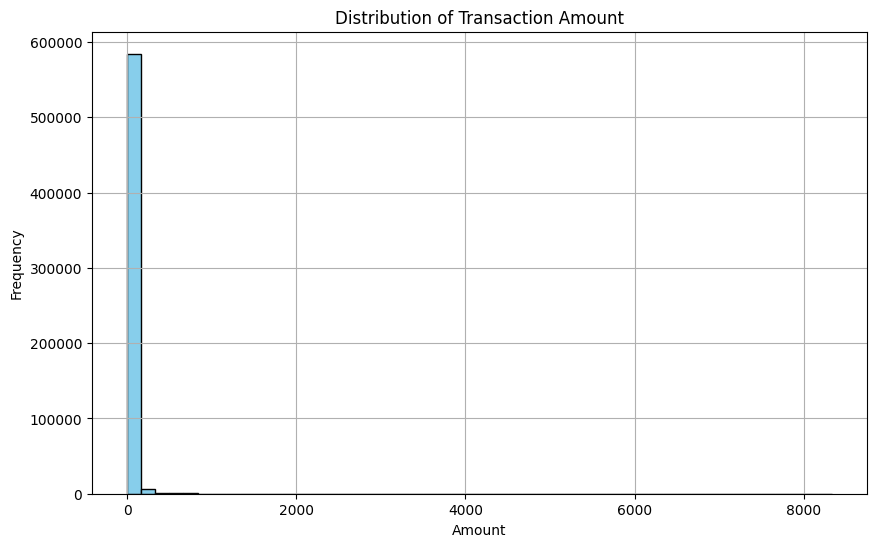

In [32]:

# Plot the distribution of 'amount'
plt.figure(figsize=(10, 6))
plt.hist(df_final_unscaled['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Log transform on amount feature

In [ ]:
df_final_unscaled['amount_log'] = np.log(df_final_unscaled['amount'])
df_final_unscaled = df_final_unscaled.drop(columns = ['amount'])


### Plot distribution of Amount

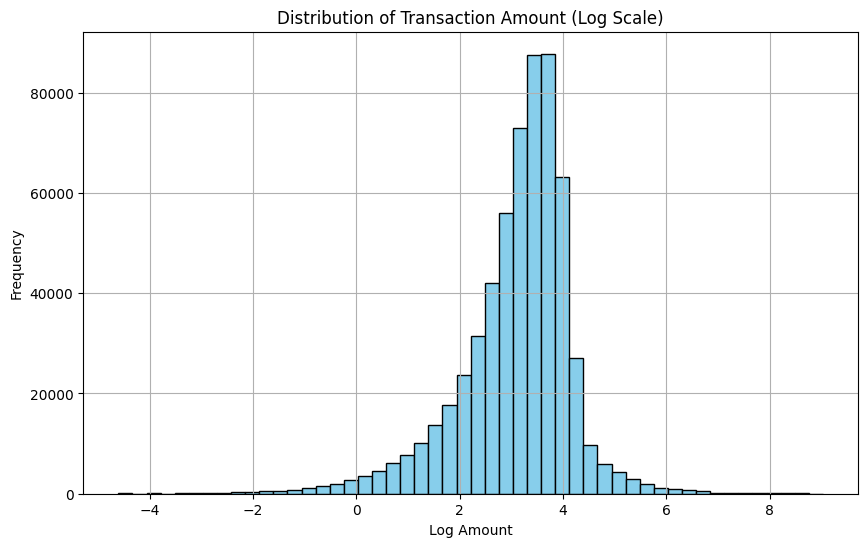

In [36]:

plt.figure(figsize=(10, 6))
plt.hist(df_final_unscaled['amount_log'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amount (Log Scale)')
plt.xlabel('Log Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [40]:
df_final_unscaled.replace([np.inf, -np.inf], np.nan, inplace=True).fillna(0)

/tmp/ipykernel_1019286/1969019325.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final_unscaled.replace([np.inf, -np.inf], np.nan, inplace=True)


## Scale all features around mean and have 0 unit

In [46]:

scaler = StandardScaler()

column_names = list(df_final_unscaled.columns)

df_final_scaled = scaler.fit_transform(df_final_unscaled.to_numpy())
df_final_scaled = pd.DataFrame(df_final_scaled, columns=column_names)
df_final_scaled['fraud'] = df_final_unscaled['fraud']
 
print("Scaled Dataset Using MinMaxScaler")
df_final_scaled.head()

Scaled Dataset Using MinMaxScaler


,step,customer,merchant,category,fraud,'M348934600'_min,'M348934600'_max,'M348934600'_mean,'M348934600'_median,'M348934600'_std,...,period,category_frequency,category_monetary,merchant_frequency,merchant_monetary,category_z_score,category_robust_z_score,merchant_z_score,merchant_robust_z_score,amount_log
0,-0.920330,-1.72278,2.460167,-2.863311,0,0.801806,-0.276027,0.501182,-0.033674,0.37075,...,-0.998011,-2.388939,-1.975674,-2.029947,-1.735031,2.055728e-18,-0.012793,-1.190538e-18,-0.012510,-0.354358
1,-0.313129,-1.72278,2.460167,-2.863311,0,0.801806,-0.276027,0.501182,-0.033674,0.37075,...,-0.403092,-2.388939,-1.945496,-2.029947,-1.705446,2.055728e-18,-0.012793,-1.190538e-18,-0.012510,0.073395
2,-0.078083,-1.72278,2.460167,-2.863311,0,0.801806,-0.276027,0.501182,-0.033674,0.37075,...,0.191827,-2.271491,-1.771319,-1.919028,-1.534698,1.030481e+00,0.043296,1.047313e+00,0.044404,0.911850
3,0.235311,-1.72278,2.460167,-2.863311,0,0.801806,-0.276027,0.501182,-0.033674,0.37075,...,0.191827,-2.271491,-1.771319,-1.919028,-1.534698,-1.030481e+00,-0.068881,-1.047313e+00,-0.069424,-0.317194
4,1.410539,-1.72278,2.460167,-2.863311,0,0.801806,-0.276027,0.501182,-0.033674,0.37075,...,1.381665,-2.388939,-1.972464,-2.029947,-1.731884,2.055728e-18,-0.012793,-1.190538e-18,-0.012510,-0.298016


### Plot amount feature after scale and log transformation

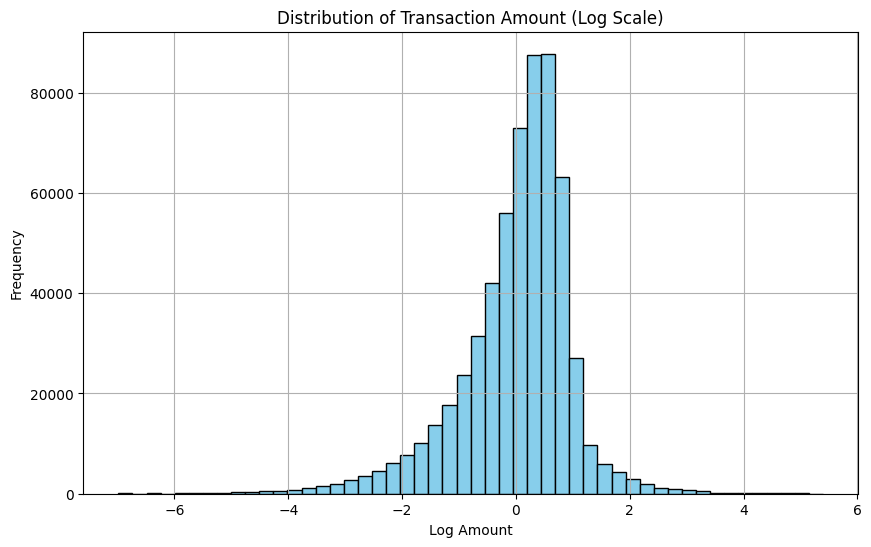

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(df_final_scaled['amount_log'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amount (Log Scale)')
plt.xlabel('Log Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Export dataset into csv

In [61]:
df_final_scaled.to_csv('df_full_banksim.csv', index=False)

-----

## Spit Dataset into Train Test Split

In [64]:
train_df, temp_df = train_test_split(df_final_scaled, test_size=0.4, stratify=df_final_scaled['fraud'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['fraud'], random_state=42)

### Print the sizes of the datasets

In [67]:
print("Size of train_df:", train_df.shape)
print("Size of val_df:", val_df.shape)
print("Size of test_df:", test_df.shape)

Size of train_df: (356754, 472)
Size of val_df: (118918, 472)
Size of test_df: (118919, 472)


### Export datasets into CSV's

In [66]:
train_df.to_csv('D_train.csv', index=False)
val_df.to_csv('D_val.csv', index=False)
test_df.to_csv('D_test.csv', index=False)

-----